follows [this blog post](http://neuralnetworksanddeeplearning.com/chap6.html)

In [1]:
data_directory = "neural-networks-and-deep-learning/data/"

"neural-networks-and-deep-learning/data/"

In [5]:
using PyPlot

INFO: Loading help data...


In [3]:
training_data = readcsv(join([data_directory, "training.csv"]))'

784x50000 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [4]:
training_answers = readcsv(join([data_directory, "training_answers.csv"]))[:]

50000-element Array{Float64,1}:
 5.0
 0.0
 4.0
 1.0
 9.0
 2.0
 1.0
 3.0
 1.0
 4.0
 3.0
 5.0
 3.0
 ⋮  
 9.0
 0.0
 8.0
 5.0
 5.0
 2.0
 4.0
 5.0
 0.0
 8.0
 4.0
 8.0

Label: 4

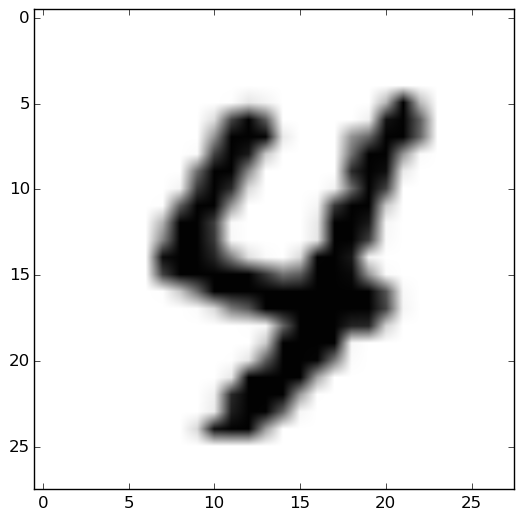

In [15]:
i = rand(1:50000)
imshow(reshape(training_data[:,i],(28,28))',cmap="Greys")
@printf("Label: %i", training_answers[i])

In [59]:
Im = reshape(training_data[:,1],(28,28))';

In [60]:
W = rand(5,5)

5x5 Array{Float64,2}:
 0.83163   0.318374   0.350365  0.295883  0.847799
 0.513987  0.103368   0.279248  0.479038  0.316883
 0.648797  0.0439362  0.597623  0.95046   0.958399
 0.872733  0.124475   0.105118  0.681165  0.494719
 0.889555  0.0356487  0.555754  0.385617  0.798662

In [61]:
sum(Im[10:14,10:14] .* W)

6.51744696565414

In [62]:
function do_convolution(image, w, b, σ)
    width, height = size(image)
    result = Array(Float64, (width-4, height-4))
    for i = 3:(width-2)
        for j = 3:(height-2)
            result[i-2,j-2] = σ(sum(w .* image[i + [(-2):2], j + [(-2):2]]) + b[i,j])
        end
    end
    return result
end

do_convolution (generic function with 1 method)

In [63]:
function sigmoid(x)
    return 1.0./(1.0 + exp(-x))
end

sigmoid (generic function with 1 method)

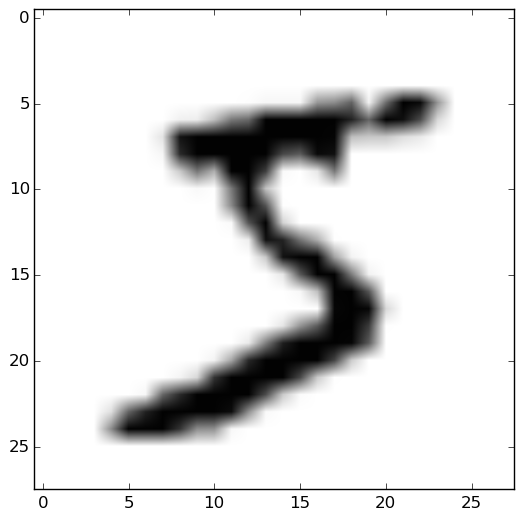

PyObject <matplotlib.image.AxesImage object at 0xa90bdaec>

In [64]:
imshow(Im, cmap="Greys")

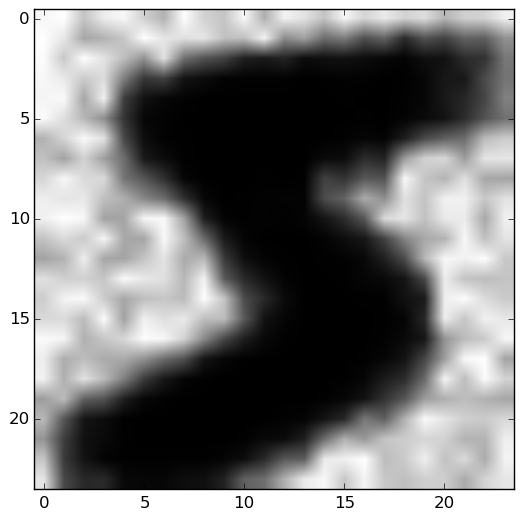

PyObject <matplotlib.image.AxesImage object at 0xa8fc13ac>

In [65]:
imshow(do_convolution(Im, W, rand(28,28), sigmoid),cmap="Greys")